Dataset available at : https://www.kaggle.com/c/otto-group-product-classification-challenge/data

# 1. Prepare Problem

## a) Load libraries 

In [8]:
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import time
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

## b) Load dataset

In [9]:
# load data
data = read_csv('train.csv')
dataset = data.values

In [10]:
#shape
dataset.shape

(61878, 95)

# 2. Split-out validation dataset

In [18]:
# split data into X and y
X = dataset[:,0:94]
y = dataset[:,94]

In [19]:
# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)

# 3. Tune Multithreading Support for XGBoost

In [20]:
# evaluate the effect of the number of threads
results = []
num_threads = [1, 2, 3, 4]
for n in num_threads:
    start = time.time()
    model = XGBClassifier(nthread=n)
    model.fit(X, label_encoded_y)
    elapsed = time.time() - start
    print(n, elapsed)
    results.append(elapsed)

1 160.67151284217834
2 97.99411010742188
3 73.43612360954285
4 66.05983114242554


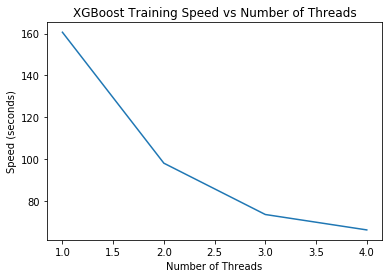

In [21]:
# plot results
pyplot.plot(num_threads, results)
pyplot.ylabel('Speed (seconds)')
pyplot.xlabel('Number of Threads')
pyplot.title('XGBoost Training Speed vs Number of Threads')
pyplot.show()

# 4. Parallelism When Cross Validating 

In [30]:
# prepare cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
kfold.get_n_splits(X, y=label_encoded_y)

10

In [33]:
# Single Thread XGBoost, Parallel Thread CV
start = time.time()
model = XGBClassifier(nthread=1)
results = cross_val_score(model, X, label_encoded_y, cv=kfold, scoring='neg_log_loss', n_jobs=-1)
elapsed = time.time() - start

print("Single Thread XGBoost, Parallel Thread CV: %f" % (elapsed))

Single Thread XGBoost, Parallel Thread CV: 515.620659


In [34]:
# Parallel Thread XGBoost, Single Thread CV
start = time.time()
model = XGBClassifier(nthread=-1)
results = cross_val_score(model, X, label_encoded_y, cv=kfold, scoring='neg_log_loss', n_jobs=1)
elapsed = time.time() - start

print("Parallel Thread XGBoost, Single Thread CV: %f" % (elapsed))

Parallel Thread XGBoost, Single Thread CV: 577.989076


In [35]:
# Parallel Thread XGBoost and CV
start = time.time()
model = XGBClassifier(nthread=-1)
results = cross_val_score(model, X, label_encoded_y, cv=kfold, scoring='neg_log_loss',
n_jobs=-1)
elapsed = time.time() - start

print("Parallel Thread XGBoost and CV: %f" % (elapsed))

Parallel Thread XGBoost and CV: 399.949907
